In [2]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [2]:
df = pd.read_csv('C:\\Users\\M\\Downloads\\Bigdata\\sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
y=df[60]
x=df.drop(60,axis=1)

In [12]:
label=LabelEncoder()
y_enc=label.fit_transform(y)

In [ ]:
y_enc

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_enc,test_size=0.2,random_state=42)

In [18]:
model=Sequential()
model.add(Dense(60,input_dim=60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6561 - loss: 0.6847
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 0.6684 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 0.6607 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 0.6558 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.6380 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7648 - loss: 0.6181 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7255 - loss: 0.6074 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.5831 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7414 - loss: 0.5688 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7554 - loss: 0.5526 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7291 - loss: 0.5439 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.5225 
Ep

In [21]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 0.3529  


[0.37670379877090454, 0.8333333134651184]

In [35]:
model.save('my_model.keras') 

In [3]:
from tensorflow.keras.models import load_model

In [36]:
model=load_model('my_model.keras') 

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3529  


[0.37670379877090454, 0.8333333134651184]

In [38]:
model.fit(x_train, y_train, epochs=50, batch_size=5)

Epoch 1/50


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9606 - loss: 0.0975   
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9630 - loss: 0.0991 
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9617 - loss: 0.0915 
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0217 
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9976 - loss: 0.0266
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.0400 
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0233
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9936 - loss: 0.0276
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0125 
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9666 - loss: 0.0564 
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0106 
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9875

In [39]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.4312 


[0.4579654037952423, 0.8333333134651184]

In [7]:
df = pd.read_csv('C:\\Users\\M\\Downloads\\wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
datasets = df.values
datasets.shape

In [9]:
x = datasets[:,0:12]
y = datasets[:,12]

In [10]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
model.fit(x_train, y_train, epochs=30, batch_size=5, validation_data=(x_test, y_test))

Epoch 1/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8875 - loss: 0.6848 - val_accuracy: 0.9177 - val_loss: 0.2863
Epoch 2/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9408 - loss: 0.1804 - val_accuracy: 0.9462 - val_loss: 0.1643
Epoch 3/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9459 - loss: 0.1531 - val_accuracy: 0.9577 - val_loss: 0.1218
Epoch 4/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9415 - loss: 0.1513 - val_accuracy: 0.9408 - val_loss: 0.1917
Epoch 5/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9579 - loss: 0.1180 - val_accuracy: 0.9631 - val_loss: 0.1134
Epoch 6/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9699 - loss: 0.0996 - val_accuracy: 0.9731 - val_loss: 0.0919
Epoch 7/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9629 - loss: 0.0990 - val_accuracy: 0.9546 - val_loss: 0.1362
Epoch 8/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.0848 - 

In [14]:
model.save('last_model.keras')

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
import os

model_dir = './model'
os.mkdir(model_dir)

In [29]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [30]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=50, batch_size=5, validation_data=(x_test, y_test), callbacks=[checkpointer])

Epoch 1/50
 993/1040 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8600 - loss: 0.6607
Epoch 1: val_loss improved from inf to 0.24961, saving model to ./model/01-0.2496.keras
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8624 - loss: 0.6436 - val_accuracy: 0.9192 - val_loss: 0.2496
Epoch 2/50
1033/1040 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9297 - loss: 0.1917
Epoch 2: val_loss improved from 0.24961 to 0.16373, saving model to ./model/02-0.1637.keras
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9298 - loss: 0.1916 - val_accuracy: 0.9377 - val_loss: 0.1637
Epoch 3/50
1039/1040 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9398 - loss: 0.1673
Epoch 3: val_loss improved from 0.16373 to 0.13541, saving model to ./model/03-0.1354.keras
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9398 - loss: 0.1673 - val_accuracy: 0.9500 - val_loss: 0.1354
Epoch 4/50
1032/1040 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9490 - loss: 0.1484
Epoch 4: val_loss

In [28]:
model.evaluate(x_test,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.0580  


[0.058841295540332794, 0.9823076725006104]

In [23]:
model=load_model('./model/50-0.0546.keras')

In [24]:
model.evaluate(x_test,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9854 - loss: 0.0499   


[0.05463871359825134, 0.986923098564148]

In [34]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [35]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=1000, batch_size=30, validation_data=(x_test, y_test), callbacks=[checkpointer, early_stopping])

Epoch 1/1000
141/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 0.3050
Epoch 1: val_loss improved from inf to 0.20546, saving model to ./model/01-0.2055.keras
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8810 - loss: 0.2958 - val_accuracy: 0.9292 - val_loss: 0.2055
Epoch 2/1000
152/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9317 - loss: 0.1963
Epoch 2: val_loss improved from 0.20546 to 0.18613, saving model to ./model/02-0.1861.keras
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9318 - loss: 0.1960 - val_accuracy: 0.9354 - val_loss: 0.1861
Epoch 3/1000
160/174 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.9412 - loss: 0.1717
Epoch 3: val_loss did not improve from 0.18613
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9409 - loss: 0.1722 - val_accuracy: 0.9385 - val_loss: 0.1879
Epoch 4/1000
162/174 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.9394 - loss: 0.1689
Epoch 4: val_loss improved from 0.18613 to 0.13608, saving model t

In [38]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train, epochs=30, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8865 - loss: 0.2872 - val_accuracy: 0.9292 - val_loss: 0.2077
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.1841 - val_accuracy: 0.9369 - val_loss: 0.1729
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9392 - loss: 0.1731 - val_accuracy: 0.9392 - val_loss: 0.1692
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9493 - loss: 0.1490 - val_accuracy: 0.9477 - val_loss: 0.1530
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9476 - loss: 0.1583 - val_accuracy: 0.9469 - val_loss: 0.1534
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 0.1753 - val_accuracy: 0.9577 - val_loss: 0.1288
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9569 - loss: 0.1199 - val_accuracy: 0.9508 - val_loss: 0.1415
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9623 - loss: 0.1159 - val_accuracy: 0.

In [41]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [42]:
history.history['loss']

[0.22360502183437347,
 0.18374978005886078,
 0.17770279943943024,
 0.1594782918691635,
 0.16343247890472412,
 0.1491135209798813,
 0.12447257339954376,
 0.11075370013713837,
 0.10021789371967316,
 0.11136990040540695,
 0.08381448686122894,
 0.0859997496008873,
 0.09479296207427979,
 0.07162115722894669,
 0.07477448135614395,
 0.07628866285085678,
 0.07401544600725174,
 0.08768749237060547,
 0.07131623476743698,
 0.06483279168605804,
 0.06928522884845734,
 0.06331907957792282,
 0.06003490090370178,
 0.058311767876148224,
 0.06292059272527695,
 0.061166297644376755,
 0.057188451290130615,
 0.05750754848122597,
 0.05756914243102074,
 0.06461774557828903]

In [43]:
history.history['val_loss']

[0.20770002901554108,
 0.17293529212474823,
 0.16921746730804443,
 0.1530284583568573,
 0.15337590873241425,
 0.1288352608680725,
 0.141520157456398,
 0.10587935149669647,
 0.09531411528587341,
 0.09831087291240692,
 0.08801741898059845,
 0.08490347117185593,
 0.11332353949546814,
 0.09189026057720184,
 0.07801356911659241,
 0.07592472434043884,
 0.07388234883546829,
 0.13532644510269165,
 0.10999538749456406,
 0.07297679781913757,
 0.09037098288536072,
 0.07268893718719482,
 0.07057172060012817,
 0.06439465284347534,
 0.0776519775390625,
 0.06731518357992172,
 0.11532457917928696,
 0.09535537660121918,
 0.13338316977024078,
 0.06706086546182632]

In [45]:
import matplotlib.pyplot as plt

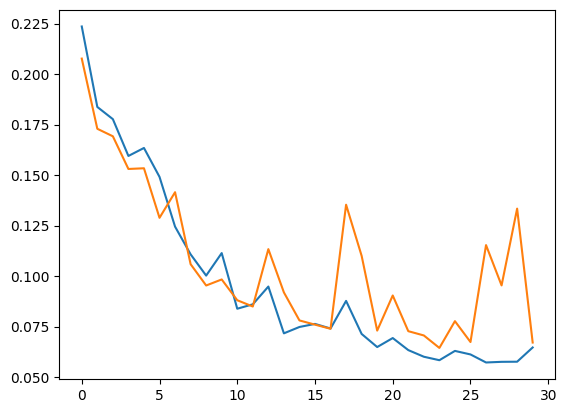

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [47]:
history.history['accuracy']

[0.9168751239776611,
 0.935154914855957,
 0.9374639391899109,
 0.9441985487937927,
 0.9443910121917725,
 0.9467000365257263,
 0.9534346461296082,
 0.961708664894104,
 0.9665191173553467,
 0.9611313939094543,
 0.9720993041992188,
 0.971714437007904,
 0.9682509303092957,
 0.9792187809944153,
 0.9759476780891418,
 0.9742158651351929,
 0.9740234613418579,
 0.9715220332145691,
 0.9765248894691467,
 0.9807581305503845,
 0.9792187809944153,
 0.9796035885810852,
 0.9815278053283691,
 0.9819126129150391,
 0.9796035885810852,
 0.9813354015350342,
 0.9830671548843384,
 0.9819126129150391,
 0.9824898838996887,
 0.9809505343437195]

In [48]:
history.history['val_accuracy']

[0.9292307496070862,
 0.936923086643219,
 0.939230740070343,
 0.947692334651947,
 0.9469230771064758,
 0.9576923251152039,
 0.9507692456245422,
 0.9684615135192871,
 0.9692307710647583,
 0.9661538600921631,
 0.9723076820373535,
 0.9738461375236511,
 0.9630769491195679,
 0.9753845930099487,
 0.9746153950691223,
 0.9746153950691223,
 0.9800000190734863,
 0.9530768990516663,
 0.9592307806015015,
 0.9800000190734863,
 0.9753845930099487,
 0.9776923060417175,
 0.9807692170143127,
 0.9792307615280151,
 0.9761538505554199,
 0.9815384745597839,
 0.9607692360877991,
 0.9746153950691223,
 0.9553846120834351,
 0.9823076725006104]

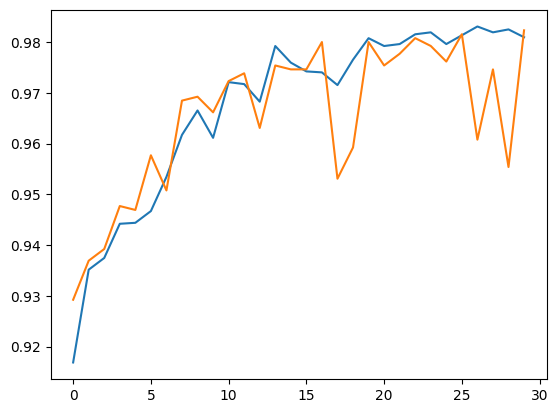

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()